# Ejercicio 2 con X y Y no lineal

# Grafico de los Datos en 2D

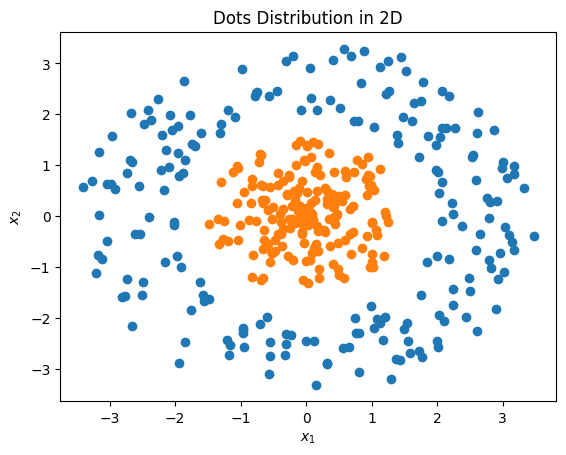

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

x_real = pd.read_csv('Xnonlinear.csv')
y_real = pd.read_csv('ynonlinear.csv')

x_real.drop('num', axis=1, inplace=True)
y_real.drop('num', axis=1, inplace=True)

x1_real = x_real[y_real['label']==-1]
x2_real = x_real[y_real['label']==1]
plt.scatter(x1_real['x1'], x1_real['x2'])
plt.scatter(x2_real['x1'], x2_real['x2'])
plt.title('Dots Distribution in 2D')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

# Grafico de los Datos en 3D

Se aumenta una dimensión a los datos para observar si pueden ser separables con un plano. La dimensión aumentada esta dada por $z = x_1^2 + x_2^2$ (z es la dimensión aumentada)

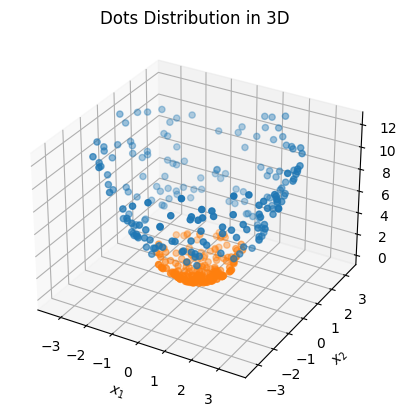

In [3]:
x_real['x1^2'] = x_real['x1'] ** 2
x_real['x2^2'] = x_real['x2'] ** 2
y_real['z'] = x_real['x1^2'] + x_real['x2^2']

x_yminus1 = x_real[y_real['label'] == -1]
x_yplus1 = x_real[y_real['label'] == 1]
z_yminus1 = y_real[y_real['label'] == -1]
z_yplus1 = y_real[y_real['label'] == 1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_yminus1['x1'], x_yminus1['x2'], z_yminus1['z'])
ax.scatter(x_yplus1['x1'], x_yplus1['x2'], z_yplus1['z'])

plt.title('Dots Distribution in 3D')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$z$')

plt.show()

En el gráfico anterior los puntos parecen ser separables por un plano, pero para observarlos de mejor manera, a continuación se realiza un grafico del plano $x_1z$ y del plano $x_2z$

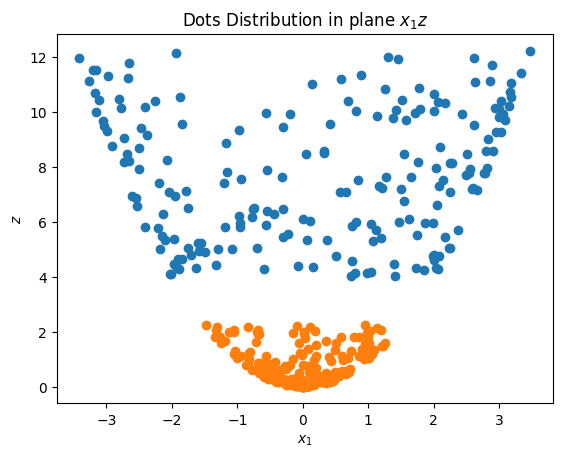

In [4]:
#Grafico del plano x1 z
plt.scatter(x_yminus1['x1'], z_yminus1['z'])
plt.scatter(x_yplus1['x1'], z_yplus1['z'])

plt.title('Dots Distribution in plane $x_1z$')

plt.xlabel('$x_1$')
plt.ylabel('$z$')
plt.show()

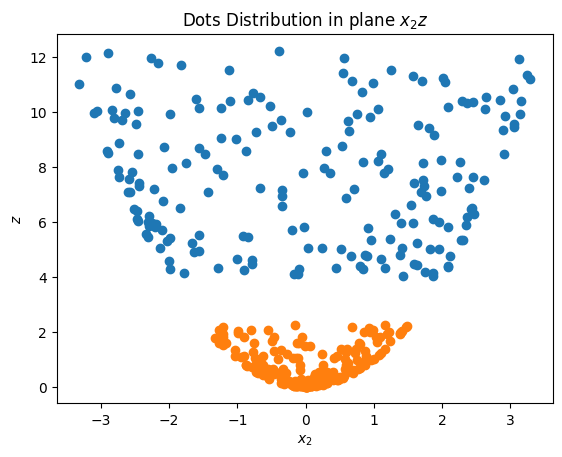

In [5]:
#Grafico del plano x2 z
plt.scatter(x_yminus1['x2'], z_yminus1['z'])
plt.scatter(x_yplus1['x2'], z_yplus1['z'])

plt.title('Dots Distribution in plane $x_2z$')

plt.xlabel('$x_2$')
plt.ylabel('$z$')
plt.show()

De los gráficos anteriores se puede observar que la característica agregada permite separar las dos clases con un plano. 

## Funciones a usar

In [6]:
import random
import numpy as np

def perceptron(x,w):
    xx = np.array(x)
    ww = np.array(w)
    z = int(np.dot(ww,np.transpose(xx)))
    return activation_function(z)
    
def activation_function(z):
    if z >= 0:
        return 1
    else:
        return -1
    
def random_weights(l):
    weights = [random.randint(0, 7) for _ in range(l)]
    return weights

def accuracy(yi, y):
    correctos = 0
    for i in range(len(yi)):
        if yi[i] == y[i]:
            correctos = correctos + 1
    return correctos/(len(yi) + 1)

## Solucion con el Algoritmo Batch

Se tienen los siguientes dataframes con la informacion necesaria para aplicar las funciones antes definidas.

In [7]:
x_real.head()

,x1,x2,x1^2,x2^2
0,0.064775,0.074421,0.004196,0.005538
1,0.325578,0.497319,0.106001,0.247326
2,0.081736,1.159518,0.006681,1.344482
3,0.053192,-0.022444,0.002829,0.000504
4,0.504479,0.387099,0.254499,0.149846


In [8]:
y_real.head()

,label,z
0,1,0.009734
1,1,0.353327
2,1,1.351163
3,1,0.003333
4,1,0.404345


In [18]:
# Algoritmo de batch
epoch = 100
n = 0.2

xReal = x_real[['x1', 'x2']]
xReal = xReal.values.tolist()
xReal = [[1] + xi for xi in xReal]
zReal = y_real['z']
zReal = zReal.values.tolist()

x_complete = []
for i in range(len(xReal)):
    x_complete.append(xReal[i] + [zReal[i]])

yReal = y_real['label']
yReal = yReal.values.tolist()

w = random_weights(len(x_complete[0]))
yPred= []
acc = []

for _ in range(epoch):
    yPred.clear()
    for xi in x_complete:
        yi = perceptron(xi,w)
        yPred.append(yi)

    for i in range(len(yReal)):
        xri = np.array(x_complete[i])
        wnp = np.array(w)
        wnp = wnp + n*(yReal[i] - yPred[i])*xri
        w = wnp.tolist()
    acc.append(accuracy(yPred, yReal))



## Resultados con Algoritmo Batch

El accuracy final del modelo es:  0.9975062344139651
Los pesos encontrados fueron: 
w_0: 326.9999999999985
w_1: -10.688467307315648
w_2: 21.137210761665656
w_3: -142.0817896066


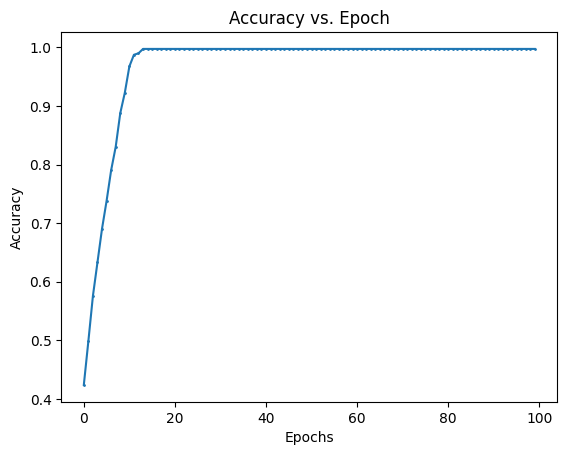

In [19]:
print('El accuracy final del modelo es: ', accuracy(yPred, yReal))
print('Los pesos encontrados fueron: ')

for i in range(len(w)):
    print('w_' + str(i) + ': ' + str(w[i]))

plt.scatter(list(range(0,100)), acc, s=1)
plt.plot(list(range(0,100)), acc)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')

plt.show()

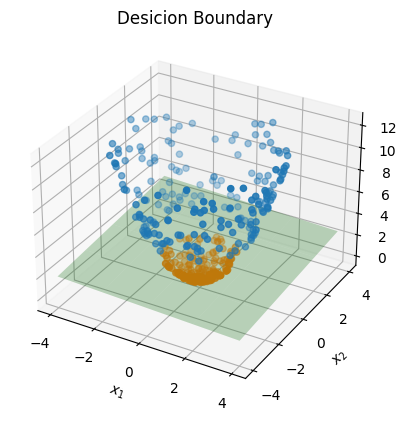

In [89]:
import math

c0 = -w[0]/w[3]
c1 = -w[1]/w[3]
c2 = -w[2]/w[3]

x_array = np.linspace(math.floor(min(x_real['x1'].values.tolist())), math.ceil(max(x_real['x1'].values.tolist())), 5)
y_array = np.linspace(math.floor(min(x_real['x2'].values.tolist())), math.ceil(max(x_real['x2'].values.tolist())), 5)

x, y = np.meshgrid(x_array, y_array)
z = c0 + c1*x + c2*y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_yminus1['x1'], x_yminus1['x2'], z_yminus1['z'])
ax.scatter(x_yplus1['x1'], x_yplus1['x2'], z_yplus1['z'])
ax.plot_surface(x, y, z, alpha=0.25, color='green')

plt.title('Desicion Boundary')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$z$')

# Mostrar el gráfico
plt.show()

Para observar mejor como el plano separa los dos conjuntos, a continuacion se presenta graficas en 2D de los planos $x_1z$ y $x_2z$

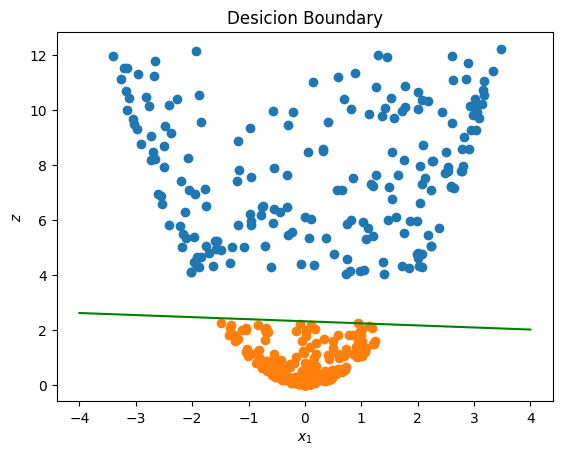

In [91]:
#Grafico del plano x1 z
z = c0 + c1*x_array

plt.scatter(x_yminus1['x1'], z_yminus1['z'])
plt.scatter(x_yplus1['x1'], z_yplus1['z'])
plt.plot(x_array, z, c='green')

plt.title('Desicion Boundary')

plt.xlabel('$x_1$')
plt.ylabel('$z$')
plt.show()

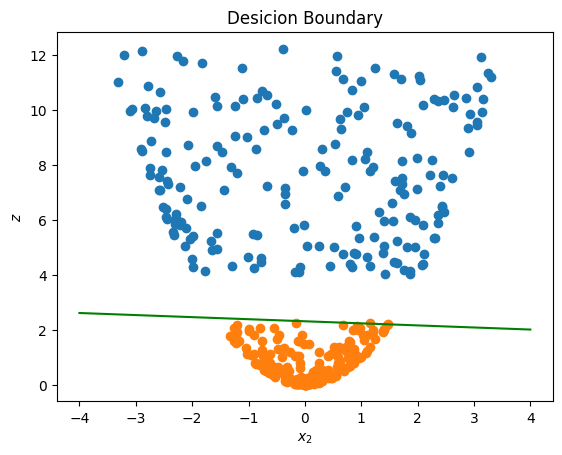

In [92]:
#Grafico del plano x2 z
z = c0 + c1*y_array

plt.scatter(x_yminus1['x2'], z_yminus1['z'])
plt.scatter(x_yplus1['x2'], z_yplus1['z'])
plt.plot(y_array, z, c='green')

plt.title('Desicion Boundary')

plt.xlabel('$x_2$')
plt.ylabel('$z$')
plt.show()

## Solucion con Algoritmo de Secuencia

In [105]:
epoch = 100
n = 0.2

xReal = x_real[['x1', 'x2']]
xReal = xReal.values.tolist()
xReal = [[1] + xi for xi in xReal]
zReal = y_real['z']
zReal = zReal.values.tolist()

x_complete = []
for i in range(len(xReal)):
    x_complete.append(xReal[i] + [zReal[i]])

yReal = y_real['label']
yReal = yReal.values.tolist()

w = random_weights(len(x_complete[0]))
yPred= []
acc = []

for _ in range(epoch):
    for i in range(len(x_complete)):
        yi = perceptron(x_complete[i],w)
        yPred.append(yi)
        xri = np.array(x_complete[i])
        wnp = np.array(w)
        wnp = wnp + n*(yReal[i] - yPred[i])*xri
        w = wnp.tolist()
    acc.append(accuracy(yPred, yReal))
    yPred.clear()

## Resultados con Algoritmo de Secuencia

El accuracy final del modelo es:  0.9975062344139651
Los pesos encontrados fueron: 
w_0: 3.3999999999999995
w_1: -0.3306392716190302
w_2: 0.4031455946012158
w_3: -1.3709604821440757


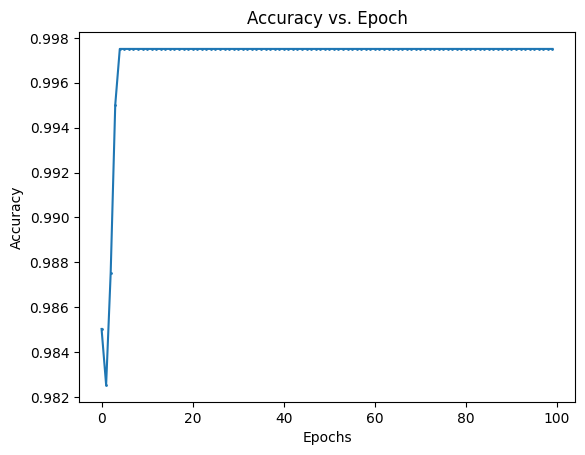

In [106]:
print('El accuracy final del modelo es: ', acc[-1])
print('Los pesos encontrados fueron: ')

for i in range(len(w)):
    print('w_' + str(i) + ': ' + str(w[i]))

plt.scatter(list(range(0,100)), acc, s=1)
plt.plot(list(range(0,100)), acc)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')

plt.show()

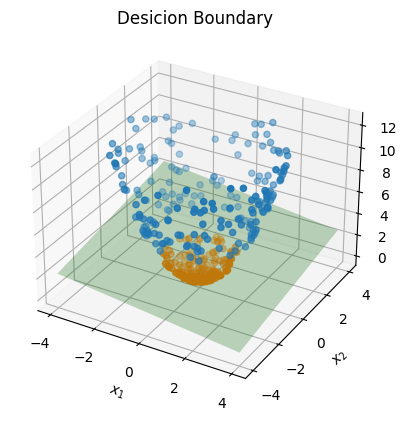

In [107]:
import math

c0 = -w[0]/w[3]
c1 = -w[1]/w[3]
c2 = -w[2]/w[3]

x_array = np.linspace(math.floor(min(x_real['x1'].values.tolist())), math.ceil(max(x_real['x1'].values.tolist())), 5)
y_array = np.linspace(math.floor(min(x_real['x2'].values.tolist())), math.ceil(max(x_real['x2'].values.tolist())), 5)

x, y = np.meshgrid(x_array, y_array)
z = c0 + c1*x + c2*y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_yminus1['x1'], x_yminus1['x2'], z_yminus1['z'])
ax.scatter(x_yplus1['x1'], x_yplus1['x2'], z_yplus1['z'])
ax.plot_surface(x, y, z, alpha=0.25, color='green')

plt.title('Desicion Boundary')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$z$')

# Mostrar el gráfico
plt.show()

Para observar mejor como el plano separa los dos conjuntos, a continuacion se presenta graficas en 2D de los planos $x_1z$ y $x_2z$

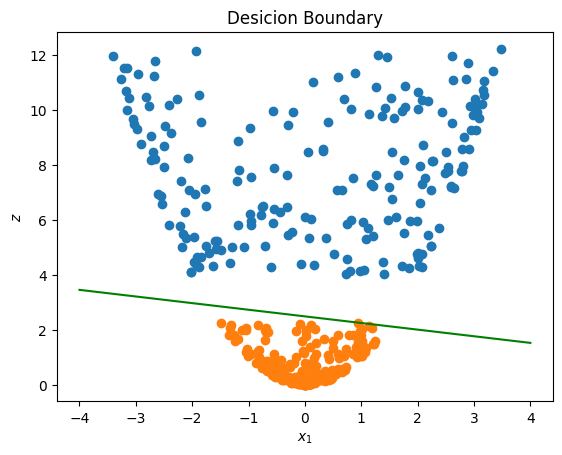

In [108]:
#Grafico del plano x1 z
z = c0 + c1*x_array

plt.scatter(x_yminus1['x1'], z_yminus1['z'])
plt.scatter(x_yplus1['x1'], z_yplus1['z'])
plt.plot(x_array, z, c='green')

plt.title('Desicion Boundary')

plt.xlabel('$x_1$')
plt.ylabel('$z$')
plt.show()

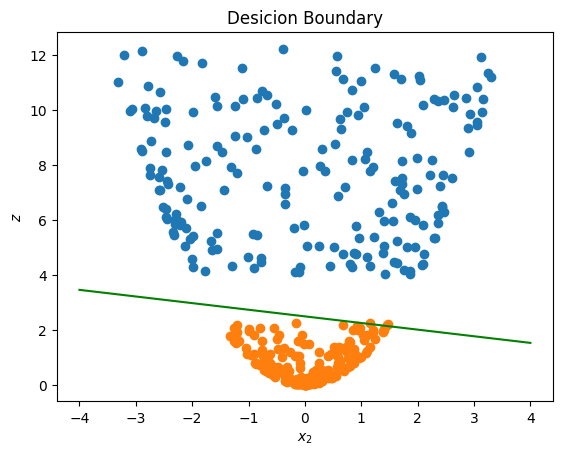

In [109]:
#Grafico del plano x2 z
z = c0 + c1*y_array

plt.scatter(x_yminus1['x2'], z_yminus1['z'])
plt.scatter(x_yplus1['x2'], z_yplus1['z'])
plt.plot(y_array, z, c='green')

plt.title('Desicion Boundary')

plt.xlabel('$x_2$')
plt.ylabel('$z$')
plt.show()